In [2]:
import numpy as np
import pandas as pd
import datetime
from datetime import date, timedelta
from time import sleep
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as pyo
from plotly.graph_objs import *
from tqdm.notebook import trange, tqdm
%matplotlib inline

In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
chromedriver_path = os.getcwd() + '/Driver/chromedriver'

In [4]:
browser = webdriver.Chrome(chromedriver_path)

In [5]:
travel_date = "2021-03-25"
locations = ['LAX','JFK','MCO','MIA','ATL','SFO','ORD']
scope = 14

In [6]:
df = pd.DataFrame()
start = (datetime.datetime.strptime(travel_date,"%Y-%m-%d")) - timedelta(days=7)
t = trange(scope)
for n in t:
    start_date = str(start + timedelta(days=n)).split()[0]
    t.set_description('Checking Dates: ' + start_date)
    end_date = str((start + timedelta(days=n)) + timedelta(days=14)).split()[0]
    for location in locations:
        h=[]
        airl=[]
        airp=[]
        p=[]
        full_list = {}
        sats = "https://www.google.com/flights/#flt=/m/04jpl."+location+"."+str(start_date)+"*"+location+"./m/04jpl."+str(end_date)+";c:GBP;e:1;s:0*0;sc:b;sd:1;t:f"
        browser.get(sats)
        sleep(3)
        hours = browser.find_elements_by_css_selector('.gws-flights-results__times')
        for hour in hours:
            h.append(hour.text)
        full_list['Flight'] = h
        airlines = browser.find_elements_by_xpath('.//span[@class = "gws-flights__ellipsize"]')
        for airline in airlines:
            airl.append(airline.text)
        full_list['Airline'] = airl
        airports = browser.find_elements_by_css_selector('.gws-flights-results__airports')
        for airport in airports:
            airp.append(airport.text)
        full_list['Airport'] = airp
        prices = browser.find_elements_by_css_selector('.gws-flights-results__price')
        for price in prices:
            p.append(price.text)
        p = list(filter(None, p))
        full_list['Price'] = p
        temp = pd.DataFrame(full_list)
        temp['Destination'] = location
        temp['Departure'] = start_date
        temp['Return'] = end_date
        df = df.append(temp)

In [7]:
df[(df['Departure']=='2021-03-25') &(df['Destination']=='JFK')]

,Flight,Airline,Airport,Price,Destination,Departure,Return
0,08:25 – 12:25,British Airways,LHR–JFK,"£1,657",JFK,2021-03-25,2021-04-08
1,09:10 – 13:15,American,LHR–JFK,"£1,657",JFK,2021-03-25,2021-04-08
2,11:25 – 15:25,British Airways,LHR–JFK,"£1,657",JFK,2021-03-25,2021-04-08
3,14:00 – 18:00,British Airways,LHR–JFK,"£1,657",JFK,2021-03-25,2021-04-08
4,09:50 – 13:55,British Airways,LHR–JFK,"£1,657",JFK,2021-03-25,2021-04-08
5,13:00 – 17:10,British Airways,LHR–JFK,"£1,657",JFK,2021-03-25,2021-04-08
6,13:45 – 18:00,American,LHR–JFK,"£1,657",JFK,2021-03-25,2021-04-08
7,16:05 – 20:10,American,LHR–JFK,"£1,657",JFK,2021-03-25,2021-04-08
8,16:20 – 20:30,British Airways,LHR–JFK,"£1,657",JFK,2021-03-25,2021-04-08
9,08:55 – 12:55,Virgin Atlantic,LHR–JFK,"£2,038",JFK,2021-03-25,2021-04-08


In [8]:
cheapest = df.groupby(['Departure','Destination'])['Price'].min().reset_index()
cheapest.sort_values(by=['Departure','Price'], inplace=True)
cheapest['Price'] = cheapest['Price'].str.replace('£', '')
cheapest['Price'] = cheapest['Price'].str.replace(',', '')
cheapest['Price'] = cheapest['Price'].apply(pd.to_numeric)
cheapest['Departure'] = pd.to_datetime(cheapest['Departure'])

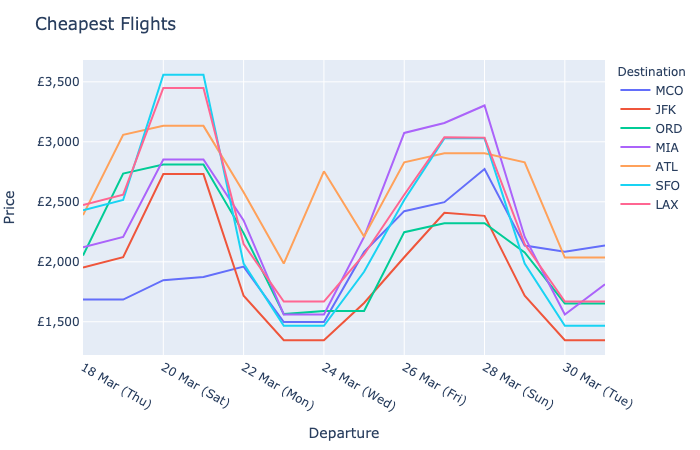

In [12]:
fig = px.line(cheapest, x='Departure', y='Price', color='Destination')
fig.update_yaxes(tickprefix="£", tickformat=",")
fig.update_xaxes(tickformat="%d %b (%a)")
fig.update_layout(title_text="Cheapest Flights")
fig.show('png')

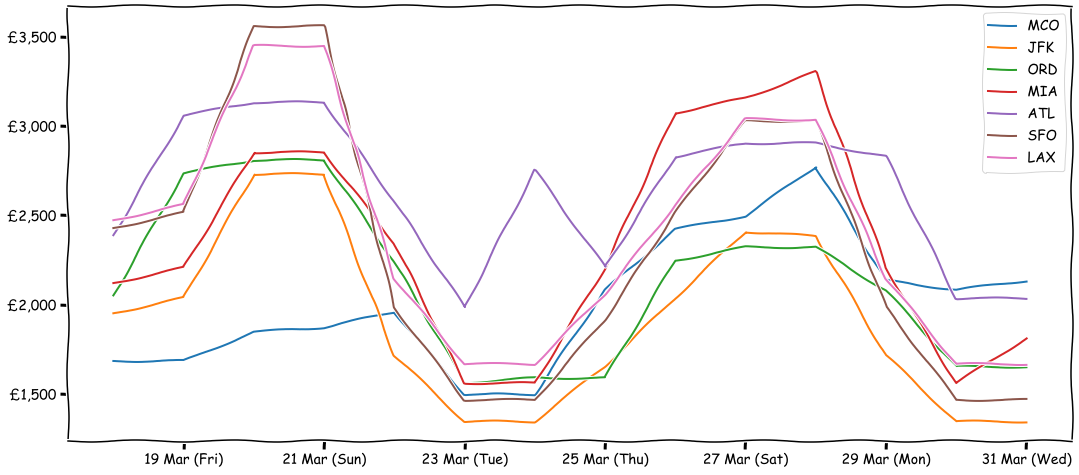

In [10]:
plt.xkcd()
fig, ax = plt.subplots(figsize=(18,8))

for dest in cheapest['Destination'].unique():
    temp = cheapest[cheapest['Destination']==dest]
    ax.plot(temp['Departure'], temp['Price'], label=dest)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('£{x:,.0f}'))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b (%a)'))
    #plt.grid(color='b', linestyle='-', linewidth=.5)
    plt.legend()

In [ ]:
#table = ff.create_table(cheapest)
#init_notebook_mode(connected=True) 
#pyo.iplot(table, filename='jupyter-table1')